In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [351]:
# df1 = pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")
df2 = pd.read_csv("IPL Matches 2008-2020.csv")

In [352]:
# df1.head()

In [353]:
df2.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [354]:
df2.drop(columns=['id'], inplace=True)
df2.drop(columns=['method'], inplace=True)
df2.dropna(subset = ['winner'], inplace=True)
df2.drop(columns=['umpire1'], inplace=True)
df2.drop(columns=['umpire2'], inplace=True)
df2.drop(columns=['date'], inplace=True)
df2.drop(columns=['player_of_match'], inplace=True)
df2.drop(columns=['neutral_venue'], inplace=True)
df2.drop(columns=['eliminator'], inplace=True)
df2.drop(columns=['city'], inplace=True)
df2.drop(columns=['venue'], inplace=True)
df2.drop(columns=['result_margin'], inplace=True)
# sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)

In [355]:
df2['result_margin'].fillna(df2['result_margin'].mean(), inplace=True)

KeyError: 'result_margin'

In [356]:
print(df2.shape)

(812, 6)


In [357]:
df2.isna().sum(axis=0)

team1            0
team2            0
toss_winner      0
toss_decision    0
winner           0
result           0
dtype: int64

In [358]:
df2.head()

,team1,team2,toss_winner,toss_decision,winner,result
0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs
1,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs
2,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets
3,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets
4,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets


In [359]:
len(df2['winner'].unique())

15

In [360]:
dic = {'Royal Challengers Bangalore' : 1, 'Kings XI Punjab' : 2, 'Delhi Daredevils' : 3, 'Mumbai Indians' : 4, 'Kolkata Knight Riders' : 5, 'Rajasthan Royals' : 6, 'Deccan Chargers' : 7, 'Chennai Super Kings' : 8, 'Kochi Tuskers Kerala' : 9, 'Pune Warriors' : 10, 'Sunrisers Hyderabad' : 11, 'Gujarat Lions' : 12, 'Rising Pune Supergiants' : 13, 'Rising Pune Supergiant' : 14, 'Delhi Capitals' : 15}

In [361]:
dic1 = {'Royal Challengers Bangalore' : 1, 'Kings XI Punjab' : 2, 'Delhi Daredevils' : 3, 'Mumbai Indians' : 4, 'Kolkata Knight Riders' : 5, 'Rajasthan Royals' : 6, 'Deccan Chargers' : 7, 'Chennai Super Kings' : 8, 'Kochi Tuskers Kerala' : 9, 'Pune Warriors' : 10, 'Sunrisers Hyderabad' : 11, 'Gujarat Lions' : 12, 'Rising Pune Supergiants' : 13, 'Rising Pune Supergiant' : 14, 'Delhi Capitals' : 15, 'tie':16}

In [362]:
df2["team1"].replace(dic, inplace=True)
df2["team2"].replace(dic, inplace=True)
df2["toss_winner"].replace(dic, inplace=True)
df2["winner"].replace(dic, inplace=True)
df2["toss_decision"].replace({'field':1, 'bat':2}, inplace=True)
df2["result"].replace({'runs':1, 'wickets':2, 'tie':3}, inplace=True)


In [363]:
df2.head()

,team1,team2,toss_winner,toss_decision,winner,result
0,1,5,1,1,5,1
1,2,8,8,2,8,1
2,3,6,6,2,3,2
3,4,1,4,2,1,2
4,5,7,7,2,5,2


<AxesSubplot:>

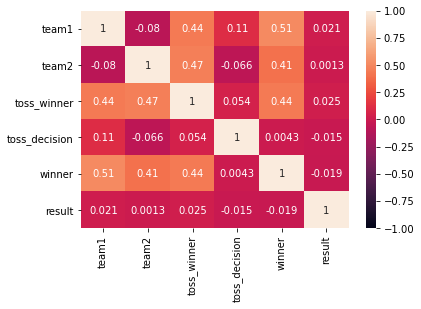

In [364]:

sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)

In [365]:
x = df2.drop(columns=['winner'], axis=0)
y = df2['winner']

In [366]:
from sklearn.model_selection import train_test_split

In [367]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, random_state=42)

In [368]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier()
rfr.fit(x_train, y_train)

RandomForestClassifier()

In [369]:
y_pred = rfr.predict(x_test)

In [370]:
for i in range (len(y_pred)):
    y_pred[i] = int(y_pred[i])

In [371]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.7361963190184049

In [372]:
dic

{'Royal Challengers Bangalore': 1,
 'Kings XI Punjab': 2,
 'Delhi Daredevils': 3,
 'Mumbai Indians': 4,
 'Kolkata Knight Riders': 5,
 'Rajasthan Royals': 6,
 'Deccan Chargers': 7,
 'Chennai Super Kings': 8,
 'Kochi Tuskers Kerala': 9,
 'Pune Warriors': 10,
 'Sunrisers Hyderabad': 11,
 'Gujarat Lions': 12,
 'Rising Pune Supergiants': 13,
 'Rising Pune Supergiant': 14,
 'Delhi Capitals': 15}

In [373]:
team1 = 'Kolkata Knight Riders'
team2 = 'Kings XI Punjab'
toss_winner = 'Kings XI Punjab'
toss_decision = 'field'
result = 'wickets'

toss_dec_dic = {'field':1, 'bat':2}
toss_dec = toss_dec_dic[toss_decision]

res_dic = {'runs':1, 'wickets':2, 'tie':3}
res = res_dic[result]
arr_pred = [[dic[team1], dic[team2], dic[toss_winner], toss_dec, res]]
pred = rfr.predict(arr_pred)

for key, value in dic.items():
     if value == pred:
            print("Winner Should Be: " + key)

Winner Should Be: Kings XI Punjab
